In [1]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings('ignore') # 경고창 무시
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # cross_val_score : 다양한 샘플링을 해서 여러번 테스트 --> 평균치를 구해본다!
from sklearn.metrics import *
from sklearn.metrics import classification_report

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc, font_manager
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../data06/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [3]:
from sklearn.preprocessing import StandardScaler # 표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, min-max기준)

In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris() # iris 데이터 불러와서 iris라고 명명
iris # iris 보기

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
# iris에 대해 introspection(자기관찰)
iris?

Type:        Bunch
String form:
{'data': array([[5.1, 3.5, 1.4, 0.2],
           [4.9, 3. , 1.4, 0.2],
           [4.7, 3.2, 1.3, 0.2],
           <...> ength (cm)', 'petal width (cm)'], 'filename': 'iris.csv', 'data_module': 'sklearn.datasets.data'}
Length:      8
File:        c:\users\hi\appdata\roaming\python\python37\site-packages\sklearn\utils\__init__.py
Docstring:  
Container object exposing keys as attributes.

Bunch objects are sometimes used as an output for functions and methods.
They extend dictionaries by enabling values to be accessed by key,
`bunch["value_key"]`, or by an attribute, `bunch.value_key`.

Examples
--------
>>> from sklearn.utils import Bunch
>>> b = Bunch(a=1, b=2)
>>> b['b']
2
>>> b.b
2
>>> b.a = 3
>>> b['a']
3
>>> b.c = 6
>>> b['c']
6


In [7]:
# iris의 타입 찍어보기
type(iris) # dic을 wrapping(boxing) class

sklearn.utils.Bunch

In [8]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
iris.data[:5] # iris의 data를 5개만 보여주도록 슬라이싱

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
len(iris.target)

150

In [12]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [13]:
# iris2라는 DataFrame으로 만들기
iris2 = pd.DataFrame(data=iris.data,
                      columns=iris.feature_names # target을 설명할 수 있는 설명 변수 (4개)
)
iris2['species'] = iris['target']
iris2.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0

In [14]:
# iris2에 대한 정보
iris2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [15]:
iris2['species'] = iris2['species'].astype('category')

In [16]:
iris2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [17]:
iris2['species'] = iris2['species'].cat.rename_categories(iris.target_names)
iris2['species']
# 라벨 이코딩은 abc 순서대로 되어있기 때문에, abc 순서대로 rename 된다

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [18]:
# iris2에 대해 위에서부터 5개 보기
iris2.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [19]:
# iris2에 대한 요약
iris2.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [20]:
iris2.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

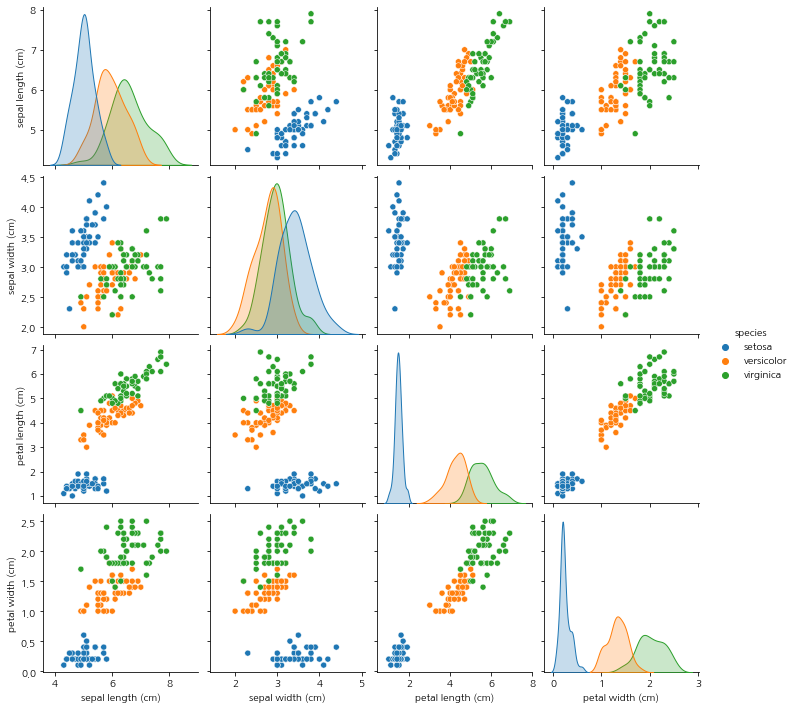

In [21]:
# pairplot
sns.pairplot(iris2, hue='species')

TypeError: 'FacetGrid' object is not subscriptable

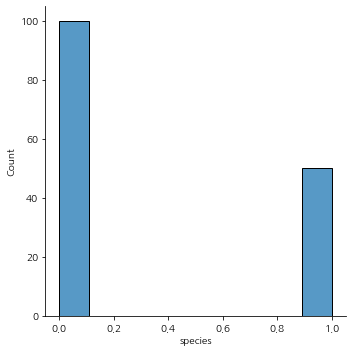

In [22]:
sns.displot(iris2['species'] == 'setosa')['petal length (cm)']

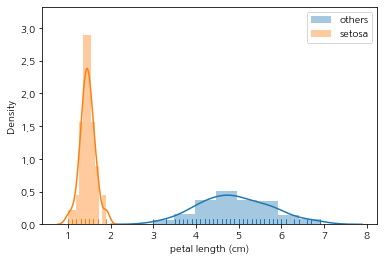

In [23]:
# setosa와 나머지의 비교를 시각화
sns.distplot(iris2[iris2.species != "setosa"]["petal length (cm)"], hist=True, rug=True, label="others")
sns.distplot(iris2[iris2.species == "setosa"]["petal length (cm)"], hist=True, rug=True, label="setosa")
plt.legend()
plt.show()

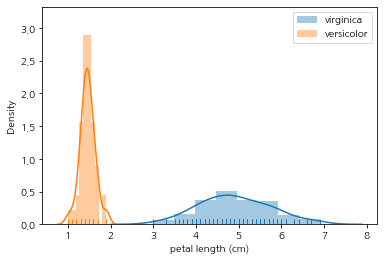

In [24]:
# virginica와 versicolor의 비교를 시각화 (조건을 setosa로 주었을 경우)
sns.distplot(iris2[iris2.species != "setosa"]["petal length (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(iris2[iris2.species == "setosa"]["petal length (cm)"], hist=True, rug=True, label="versicolor")
plt.legend()
plt.show()

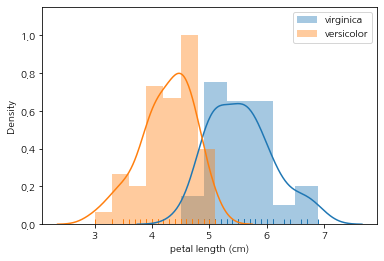

In [25]:
# virginica와 versicolor의 비교를 시각화 (조건을 각각의 값들로 주었을 경우)
sns.distplot(iris2[iris2.species == "virginica"]["petal length (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(iris2[iris2.species == "versicolor"]["petal length (cm)"], hist=True, rug=True, label="versicolor")
plt.legend()
plt.show()

In [26]:
# insight
# 1. setosa가 꽃잎의 길이가 제일 짧다
# 2. virginica가 꽃잎의 길이가 제일 길다
# 3. 꽃잎의 길이가 1.5 전후 짧은 것은 모두 setosa이다
# 4. virginica가 versicolor보다는 꽃잎의 길이가 약간 긴 편이지만,
# 종을 판별하기 위한 절대적인 기준이 되지는 않는다

In [27]:
# petal width 3가지 품종을 비교 후 판단

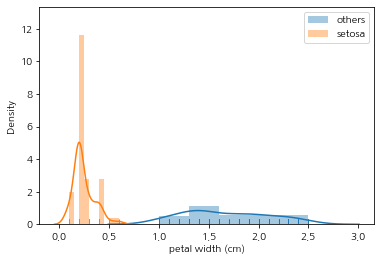

In [28]:
# setosa와 나머지의 비교를 시각화
sns.distplot(iris2[iris2.species != "setosa"]["petal width (cm)"], hist=True, rug=True, label="others")
sns.distplot(iris2[iris2.species == "setosa"]["petal width (cm)"], hist=True, rug=True, label="setosa")
plt.legend()
plt.show()

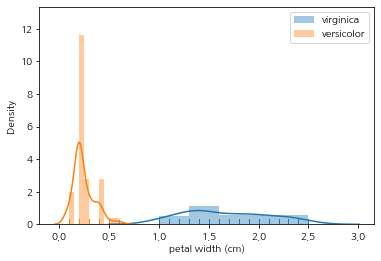

In [29]:
# virginica와 versicolor의 비교를 시각화 (조건을 setosa로 주었을 경우)
sns.distplot(iris2[iris2.species != "setosa"]["petal width (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(iris2[iris2.species == "setosa"]["petal width (cm)"], hist=True, rug=True, label="versicolor")
plt.legend()
plt.show()

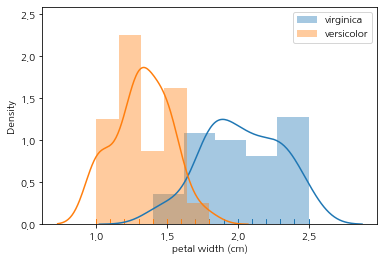

In [30]:
# virginica와 versicolor의 비교를 시각화 (조건을 각각의 값들로 주었을 경우)
sns.distplot(iris2[iris2.species == "virginica"]["petal width (cm)"], hist=True, rug=True, label="virginica")
sns.distplot(iris2[iris2.species == "versicolor"]["petal width (cm)"], hist=True, rug=True, label="versicolor")
plt.legend()
plt.show()

In [31]:
# insight
# 1. 꽃잎의 너비를 비교 결과, setosa가 제일 작은 꽃임
# 2. 전체적인 꽃잎의 크기는 virginica가 제일 크다
# 3. 꽃잎의 너비가 다른 꽃보다 상대적으로 많이 setosa가 작으므로,
# 꽃잎의 너비 1미만은 모두 setosa이다
# 4. 꽃잎의 너비는 iris의 품종을 분류하기에 적합한 항목이 됨

In [32]:
from pandas.plotting import parallel_coordinates

Text(0, 0.5, 'values')

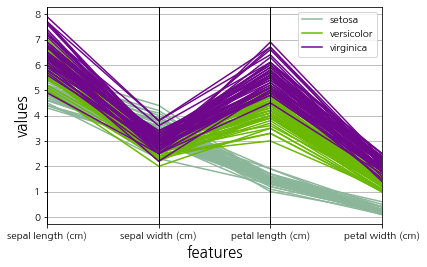

In [33]:
parallel_coordinates(iris2, "species")
plt.xlabel('features', fontsize=15)
plt.ylabel('values', fontsize=15)

In [34]:
# petal width, petal length는 학습의 중요 속성이 될 예정이므로 사용
# sepal width, sepal length는 구분의 중요 속성이 아니므로 제거해도 될 것 같음

In [35]:
# sepal width, sepal length 각각 항목별로 꽃들이 어던 차이를 가지는지 범위를 표준화시켜 비교해본다.

In [36]:
ss = StandardScaler() # 표준(평균값 기준)

In [37]:
# 표준화를 기준으로 인코딩을 하려고 함
# fit --> transform, fit_transform

In [38]:
# ss.fit_transform(iris2['species']) --> error : could not convert string to float: 'setosa'

In [39]:
## iloc[:-1]에 대해서

In [40]:
test_list = [1, 2, 3]

In [41]:
test_list[0]

1

In [42]:
test_list[-1]

3

In [43]:
ss.fit_transform(iris2.iloc[:,:-1])[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                    iris2.iloc[:,:-1], # 문제
                                    iris2.iloc[:,-1], # 정답
                                    test_size = 0.2, # 테스트 비율
                                    random_state = 42 # 랜덤 시드값
)

In [45]:
print('train data :',  X_train.shape, Y_train.shape)
print('test data :', X_test.shape, Y_test.shape)

train data : (120, 4) (120,)
test data : (30, 4) (30,)


In [46]:
Y_test.index

Int64Index([ 73,  18, 118,  78,  76,  31,  64, 141,  68,  82, 110,  12,  36,
              9,  19,  56, 104,  69,  55, 132,  29, 127,  26, 128, 131, 145,
            108, 143,  45,  30],
           dtype='int64')

In [47]:
Y_test.value_counts()

virginica     11
setosa        10
versicolor     9
Name: species, dtype: int64

In [48]:
# 스케일링할 때, 전체데이터나 훈련데이터로 평균(fit)를 시키고,
# 절대 검증데이터로 fit시키지 않는다
# 이유 --> 훈련데이터와 검증데이터의 스케일링 기준이 달라지기 때문이다

In [49]:
X_train_s = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns)
X_train_s[:5]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -1.473937          1.203658          -1.562535         -1.312603
1          -0.133071          2.992376          -1.276006         -1.045633
2           1.085898          0.085709           0.385858          0.289218
3          -1.230143          0.756479          -1.218701         -1.312603
4          -1.717731          0.309299          -1.390618         -1.312603

In [50]:
X_test_s = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)
X_test_s[:5]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.354517         -0.585060           0.557775          0.022248
1          -0.133071          1.650837          -1.161395         -1.179118
2           2.304867         -1.032239           1.818500          1.490583
3           0.232620         -0.361470           0.443164          0.422703
4           1.207795         -0.585060           0.615081          0.289218

In [51]:
ms = MinMaxScaler()

In [52]:
ms.fit_transform(iris2.iloc[:,:-1])[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [53]:
X_train_m = pd.DataFrame(ms.fit_transform(X_train), columns=X_train.columns)
X_train_m[:5]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.088235          0.666667           0.000000          0.041667
1           0.411765          1.000000           0.087719          0.125000
2           0.705882          0.458333           0.596491          0.541667
3           0.147059          0.583333           0.105263          0.041667
4           0.029412          0.500000           0.052632          0.041667

In [54]:
X_test_m = pd.DataFrame(ms.transform(X_test), columns=X_test.columns)
X_test_m[:5]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.529412          0.333333           0.649123          0.458333
1           0.411765          0.750000           0.122807          0.083333
2           1.000000          0.250000           1.035088          0.916667
3           0.500000          0.375000           0.614035          0.583333
4           0.735294          0.333333           0.666667          0.541667

In [55]:
ms_iris2_values = ms.fit_transform(iris2.iloc[:, :-1])
ms_iris2_values[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [56]:
ms_iris2 = pd.DataFrame(ms_iris2_values, columns=iris.feature_names)
ms_iris2[:5]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667

In [57]:
ms_iris2['species'] = iris2['species']
ms_iris2[:5]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

Text(0, 0.5, 'features values')

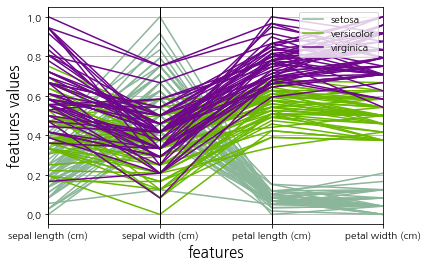

In [58]:
parallel_coordinates(ms_iris2, "species")
plt.xlabel('features', fontsize=15)
plt.ylabel('features values', fontsize=15)

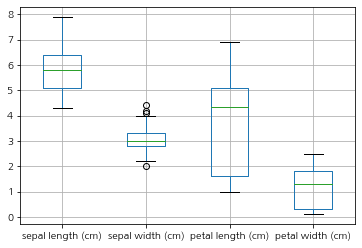

In [59]:
iris2.boxplot()

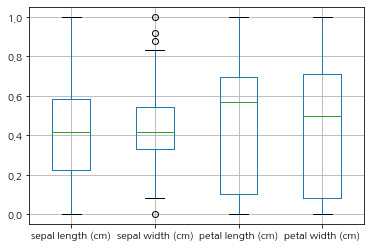

In [60]:
ms_iris2.boxplot()

In [61]:
knn = KNeighborsClassifier()

In [62]:
id(knn) # 참조형 변수 knn

2168562801688

In [63]:
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [64]:
# 교차검증
# 샘플링을 10개해서, 10번 검증을 해보세요! 의미
# X_train을 train data, validation data로 나눈다
# cv(fold값)가 10이면 validation data를 X_train의 1/10으로 잡음
# validation data의 개수는 12개, 나머지가 train data
scores = cross_val_score(knn, X_train, Y_train, cv = 10) # cv = fold값!
scores

array([0.91666667, 1.        , 0.91666667, 1.        , 0.83333333,
       0.83333333, 1.        , 1.        , 1.        , 0.91666667])

In [65]:
type(scores)

numpy.ndarray

In [66]:
np.mean(scores)

0.9416666666666667

In [67]:
def print_metrics(model, x, y, k):
    scores2 = cross_val_score(model, x, y, cv = k) #k = fold값!
    print('---------- 교차검증 결과---------- \n {} '.format(list(scores2)))
    acc_mean2 = np.mean(scores)
    print('---------- 교차검증 평균---------- \n {:.2f} '.format(acc_mean2))
    pred = knn.predict(X_test)
    acc = accuracy_score(Y_test, pred)
    print('acc >>', acc)
    return scores2, acc_mean2

---------- 교차검증 결과---------- 
 [0.9583333333333334, 0.9583333333333334, 0.8333333333333334, 1.0, 0.9583333333333334] 
---------- 교차검증 평균---------- 
 0.94 
acc >> 1.0


(array([1., 0., 0., 0., 0., 0., 0., 3., 0., 1.]),
 array([0.83333333, 0.85      , 0.86666667, 0.88333333, 0.9       ,
        0.91666667, 0.93333333, 0.95      , 0.96666667, 0.98333333,
        1.        ]),
 <a list of 10 Patch objects>)

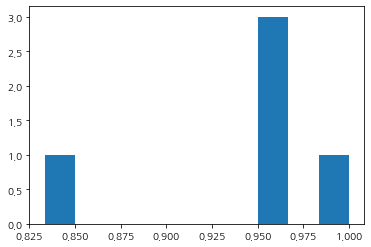

In [68]:
sc2, am2 = print_metrics(knn, X_train, Y_train, 5)
plt.hist(sc2)

In [69]:
# 스케일링한 데이터로 knn fit --> 교차검증과 test data로 검증해서 비교해보세요

In [70]:
X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(
                                                    ms_iris2.iloc[:, :-1], #문제,
                                                    ms_iris2.iloc[:, -1], #정답,
                                                    test_size=0.2, #테스트 비율,
                                                    random_state=42#랜덤 시드값
)

In [71]:
knn.fit(X_train_m, Y_train_m)

KNeighborsClassifier()

---------- 교차검증 결과---------- 
 [0.9583333333333334, 1.0, 0.875, 1.0, 0.9583333333333334] 
---------- 교차검증 평균---------- 
 0.94 
acc >> 0.36666666666666664


(array([1., 0., 0., 0., 0., 0., 2., 0., 0., 2.]),
 array([0.875 , 0.8875, 0.9   , 0.9125, 0.925 , 0.9375, 0.95  , 0.9625,
        0.975 , 0.9875, 1.    ]),
 <a list of 10 Patch objects>)

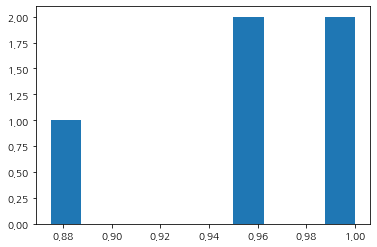

In [72]:
sc3, am3 = print_metrics(knn, X_train_m, Y_train_m, 5)
plt.hist(sc3)

In [73]:
# 모델링 선정할 때 사용
# 다양한 모델을 교차검증을 통해서 대력적으로 선정함

In [74]:
# 대략적인 모델 2~3개를 선정햇다고 가정
# 모델마다 최적의 하이퍼 파라메터가 무엇인지 찾아주는 것이 grid search

In [75]:
grid_params = {
    'n_neighbors' : list(range(1,20)), # 19개
    'weights' : ["uniform", "distance"], # 2개
    'metric' : ['euclidean', 'manhattan', 'minkowski'] # 3개
} # 19 * 2 * 3
# fold = 5 --> 19 * 2 * 3 * 5

In [76]:
gs_model = GridSearchCV(knn, grid_params, cv=5)
gs_model.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [77]:
gs_model.best_estimator_ # estimator : 평가자, 예측가, 최적의 하이퍼 파라메터가 적용된 우리가 만든 모델

KNeighborsClassifier(metric='manhattan', n_neighbors=14)

In [78]:
gs_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 14, 'weights': 'uniform'}

In [79]:
gs_model.best_score_

0.9666666666666666

In [80]:
gs_model2 = GridSearchCV(knn, grid_params, cv=5)
gs_model2.fit(X_train_m, Y_train_m)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [81]:
gs_model2.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [82]:
gs_model2.best_params_

{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}

In [83]:
gs_model2.best_score_

0.975

In [84]:
# 그리드 서치를 통해서, 최적의 파라메터를 찾았음

In [85]:
# {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
best_knn = KNeighborsClassifier(
    metric = 'manhattan', 
    n_neighbors = 14, 
    weights = 'uniform')
best_knn.fit(X_train, Y_train)

######test로 예측한 결과값######
pred3 = best_knn.predict(X_test) # 모의고사 => 작성한 답
acc3 = accuracy_score(Y_test, pred3) # 작성한 답과 실제답안지 비교
acc3

1.0

In [86]:
# {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
best_knn = KNeighborsClassifier(
    metric = 'euclidean', 
    n_neighbors = 10, 
    weights = 'uniform')
best_knn.fit(X_train, Y_train) #문제+답 훈련!!!

######test로 예측한 결과값######
pred4 = best_knn.predict(X_test) #모의고사=>작성한 답
acc4 = accuracy_score(Y_test, pred4) #작성한 답과 실제답안지 비교
acc4

1.0

In [87]:
def print_test_metrics(model, x, y):
    print('---------- Test data Accuracy -------------')
    pred3 = best_knn.predict(X_test) # 모의고사 => 작성한 답
    acc3 = accuracy_score(Y_test, pred3) # 작성한 답과 실제답안지 비교
    print('{:.2f}'.format(acc3))
    print('---------- Confusion Matrix ---------------')
    print(confusion_matrix(Y_test, pred3))
    print('---------- Confusion Matrix(precision) ---------------')
    print(precision_score(Y_test, pred3, average='macro'))
    print('---------- classification re(precision) ---------------')
    print(classification_report(Y_test, pred3))

In [88]:
print_test_metrics(knn, X_test, Y_test)

---------- Test data Accuracy -------------
1.00
---------- Confusion Matrix ---------------
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
---------- Confusion Matrix(precision) ---------------
1.0
---------- classification re(precision) ---------------
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [89]:
# 정확도는 100%
# 혼동 행렬 결과 3가지 분류를 완벽하게 함
# 다음의 혼동행렬을 분석해보세요
# ---------- Confusion Matrix ---------------
#              setosa, versicolor, virginica
# setosa        [[7          2           1]
# versicolor    [2           6           1]
# virginica     [1           4           6]]
# 한 행, 한 열은 estimator가 예측한 값
# 한 행은 실제 값
# 실제값이 setosa인데, 예측한 값이 setosa로 예측한 것이 7
#                     예측한 값이 versicolor로 예측한 것이 2
#                     예측한 값이 virginica로 예측한 것이 1
# 정확도(accuracy)는? 63%
# 혼동 행렬 결과 setosa 분류가 다른 두 분류보다 가장 정확함

In [90]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [91]:
total = [7,2,1,2,6,1,1,4,6]

In [92]:
print(sum(total))
print(len(total))

30
9


In [93]:
correct = [7,6,6]
print(sum(correct))

19


In [94]:
print((sum(correct)/sum(total))*100) # accuracy

63.33333333333333


In [95]:
# confusion matrix를 가지고, 2가지를 생각해볼 수 잇다.
# 원래 실제값 중에서 어떤 것을 맞추고, 어떤 것을 못 맞추었지??
# 예측한 값 중에서 어떤 것을 맞추고, 어떤 것을 못 맞추었지??

In [96]:
# accuracy / precision / recall
# avg(f-score)

In [97]:
# regression(회귀) : 숫자 값을 예측하는 것
# 컴퓨터는 정확한 값을 예측 불가능
# 회귀의 정확도를 구할 때, 실제 값과 얼마나 가깝게 맞추었는가로 정확도를 평가
# 잘못 맞춘 경우(실제 값과 예측값이 먼 경우) --> 오차가 크다라고 표현
# 좋은 모델은 오차가 작아야 한다
# 거리를 재서 오차를 확인
# 절대값을 씌우거나, 제곱(루트)를 해서 오차를 계산
# RMSE, ROC, AUC